In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from astropy.table import Table, vstack, hstack
from astropy.utils.data import download_file
from astropy.time import Time
from astropy.timeseries import TimeSeries
import sunpy.timeseries as ts  
import netCDF4
import xarray as xr

from bs4 import BeautifulSoup
from urllib.request import HTTPError


base_url = "http://mkwc.ifa.hawaii.edu/archive/wx/cfht/"

Error: Jupyter server crashed. Unable to connect. 
Error code from jupyter: 1

In [2]:
# header from base_url
tables = []

for i in range(1991, 2021):#1991, 2021
    # the year 2003 and 2009 skipp it now
    #if i == 2003:
    #    continue
    print('Downloading year:', i)
    # raw_table = open(download_file(base_url + 'cfht-wx.{0}.dat'.format(i), cache=True)).read()
    
        #in 2009, there is a line that looks like "12 233 3.49 16 617.9"
    if i == 2009:
        with open(download_file(base_url + 'cfht-wx.{0}.dat'.format(i), cache=False), 'r') as file:
            filename = "cfht_2009.txt"
            file.seek(0)
            lines = file.readlines()
            with open(filename, 'w') as file1:
                for i, line in enumerate(lines):
                    if i != 75411:
                        file1.write(line)
                        #print('{0}', line)
                file1.truncate()
            with open(filename, 'r') as file1:
                raw_table = file1.read()

    #in 2017, in line 497145, an 11. column appears, filled with the value 0.00
    elif i == 2017:
        with open(download_file(base_url + 'cfht-wx.{0}.dat'.format(i), cache=False), 'r') as file:
            filename = "cfht_2017.txt"
            file.seek(0)
            lines = file.readlines()
            with open(filename, 'w') as file2:
                for i, line in enumerate(lines):
                    if i < 497145:
                        file2.write(line)
                    else:
                        new_string = lines[i]
                        new_string_cut = new_string[0:(len(new_string)-5)]# header from base_url
tables = []

for i in range(1991, 2021):#1991, 2021
    # the year 2003 and 2009 skipp it now
    #if i == 2003:
    #    continue
    print('Downloading year:', i)
    # raw_table = open(download_file(base_url + 'cfht-wx.{0}.dat'.format(i), cache=True)).read()
    
        #in 2009, there is a line that looks like "12 233 3.49 16 617.9"
    if i == 2009:
        with open(download_file(base_url + 'cfht-wx.{0}.dat'.format(i), cache=False), 'r') as file:
            filename = "cfht_2009.txt"
            file.seek(0)
            lines = file.readlines()
            with open(filename, 'w') as file1:
                for i, line in enumerate(lines):
                    if i != 75411:
                        file1.write(line)
                        #print('{0}', line)
                file1.truncate()
            with open(filename, 'r') as file1:
                raw_table = file1.read()

    #in 2017, in line 497145, an 11. column appears, filled with the value 0.00
    elif i == 2017:
        with open(download_file(base_url + 'cfht-wx.{0}.dat'.format(i), cache=False), 'r') as file:
            filename = "cfht_2017.txt"
            file.seek(0)
            lines = file.readlines()
            with open(filename, 'w') as file2:
                for i, line in enumerate(lines):
                    if i < 497145:
                        file2.write(line)
                    else:
                        new_string = lines[i]
                        new_string_cut = new_string[0:(len(new_string)-5)]
                        str_assembled = (new_string_cut + '\n')
                        #print(str_assembled)
                        file2.write(str_assembled)
                with open(filename, 'r') as file2:
                    raw_table = file2.read()
    else:
        with open(download_file(base_url + 'cfht-wx.{0}.dat'.format(i), cache=True), 'r') as file:
            raw_table = file.read()
    
    #table = Table(names=('year', 'month', 'day', 'hour', 'min', 'wind_speed(kts)', 'wind_direction(dec)', 'temperature(C)', 
    #  'relative_humidity(%)', 'pressure(mb)'), dtype=('int64', 'int64','int64', 'int64','int64','int64','float64','float64', 'float64', 'float64'))        

    table = Table.read(raw_table, format='ascii.no_header', delimiter=' ')

        
            
        
    #some Tables have column 10, which is the pressure
    # if 'col10' in table.colnames and not table['col10'].dtype in (float, 'float64'):
    #    column = pd.Series(table['col10'].data)
    #    mask = column.str.contains(' ') | (column == 'N/A') | (column == '?')
    #    column[mask] = np.nan
    #    table['col10'] = column
    #    table['col10'] = table['col10'].astype(float)
        
    tables.append(table)
                        str_assembled = (new_string_cut + '\n')
                        #print(str_assembled)
                        file2.write(str_assembled)
                with open(filename, 'r') as file2:
                    raw_table = file2.read()
    else:
        with open(download_file(base_url + 'cfht-wx.{0}.dat'.format(i), cache=True), 'r') as file:
            raw_table = file.read()
    
    #table = Table(names=('year', 'month', 'day', 'hour', 'min', 'wind_speed(kts)', 'wind_direction(dec)', 'temperature(C)', 
    #  'relative_humidity(%)', 'pressure(mb)'), dtype=('int64', 'int64','int64', 'int64','int64','int64','float64','float64', 'float64', 'float64'))        

    table = Table.read(raw_table, format='ascii.no_header', delimiter=' ')

        
            
        
    #some Tables have column 10, which is the pressure
    # if 'col10' in table.colnames and not table['col10'].dtype in (float, 'float64'):
    #    column = pd.Series(table['col10'].data)
    #    mask = column.str.contains(' ') | (column == 'N/A') | (column == '?')
    #    column[mask] = np.nan
    #    table['col10'] = column
    #    table['col10'] = table['col10'].astype(float)
        
    tables.append(table)

In [3]:
#to remove the column 11 in year 2018
tables[27].remove_column('col11')
tables[27]

col1,col2,col3,col4,col5,col6,col7,col8,col9,col10
int64,int64,int64,int64,int64,int64,float64,float64,int64,float64
2018,1,1,0,0,27,23.0,-0.57,45,617.7
2018,1,1,0,1,27,27.0,-0.59,45,617.7
2018,1,1,0,2,26,24.0,-0.58,45,617.7
2018,1,1,0,3,27,21.0,-0.6,45,617.7
2018,1,1,0,4,26,22.0,-0.6,45,617.7
2018,1,1,0,5,26,22.0,-0.6,45,617.7
2018,1,1,0,6,27,21.0,-0.6,45,617.7
2018,1,1,0,7,27,25.0,-0.61,45,617.7
2018,1,1,0,8,25,26.0,-0.63,45,617.7


In [4]:
columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8','col9']
labels = ['year', 'month', 'day', 'hour', 'min', 'wind_speed(kts)', 'wind_direction(dec)', 'temperature(C)', 
          'relative_humidity(%)']

for k in range(0, 30):
    for col_ind, label in zip(columns, labels):
        if label not in tables[k].colnames:
            tables[k].rename_column(col_ind, label)
    if 'col10' in tables[k].colnames: #some Tables have column 10, which is the pressure
        tables[k].rename_column('col10', 'pressure (mb)')


In [5]:
# takes around 10 minutes on my Sony Vaio (depends..)

for table in tables: 
    try:
        if 'year' in table.colnames: 
            time_strings = ["{0}-{1}-{2}T{3}:{4}:00"
                            .format(row['year'], row['month'], row['day'], 
                                    row['hour'], row['min']).replace(',', '').replace('202013', '2013') #there are commas sometimes
                            for row in table]
            times = Time(time_strings, format='isot') #use isot to simplify inreading of textfile
            table['times'] = times
        
    except ValueError:
        pass


In [41]:
#takes around 60 min!!
#save tables to a text file, which can be read instead of running all the code above

from tabulate import tabulate

filename = 'CFHT_1991_to_2018_v2.txt'

with open(filename, 'w') as file:
    for i, table in enumerate(tables):
        file.write(tabulate(tables[i]))


In [12]:
#function to convert a parameter (e.g. PRESSURE) to sunpy timeseries and plot data

#def convert__to_sunpy_ts('downsampled_Pressure_hourly.csv', '1991_2018_CFHT_Pressure_hourly_mean.pdf',
#    'pressure (mb)', '1h')

def convert_to_sunpy_ts(tablesm, filename, parameter, time_downsample):

    timeseries = []
    downsampled = []

    if parameter == 'pressure (mb)': #pressure begins in 2009, therefore, write timeseries[i-9]
        for i, table in enumerate(tablesm):
            if parameter in table.colnames: 
                print(i)
                timeseries.append(ts.TimeSeries(hstack([table['times'], table[parameter]])))
                downsampled.append(timeseries[i-9].data.resample(time_downsample).mean()) #1m for monthly mean, 1d for daily mean, 1h for hourly mean
        df = pd.concat(downsampled)
        # save to csv
        df.to_csv(filename)
        
    elif parameter == 'relative humidity(%)':
        
        for i, table in enumerate(tablesm):
            try:
            # filter values smaller than 0 and greater than 100
            #mask = (table['relative_humidity(%)'] <= 100) | (table['relative_humidity(%)'] > 0)
            #table[mask]
            #print(table)
                timeseries.append(ts.TimeSeries(hstack([table['times'], table['relative_humidity(%)']])))
                downsampled.append(timeseries[i-1].data.resample(time_downsample).mean())
            except ValueError:
                print(i)
                
    elif parameter == 'temperature(C)':
        
        for i, table in enumerate(tablesm):
            try:
            # filter values smaller than 0 and greater than 100
            #mask = (table['relative_humidity(%)'] <= 100) | (table['relative_humidity(%)'] > 0)
            #table[mask]
            #print(table)
                timeseries.append(ts.TimeSeries(hstack([table['times'], table['temperature(C)']])))
                downsampled.append(timeseries[i].data.resample(time_downsample).mean())
            except ValueError:
                print(i)
                
        df = pd.concat(downsampled) #, header=['time', parameter]
        # save to csv
        df.to_csv(filename)

    return df


In [7]:
#function to plot timeseries of one parameter

# fig_name = '1991_2018_CFHT_Pressure_hourly_mean.pdf'
# y_axis = "pressure(mb)"
#ylim = (0, 100)

#, bool y_lim, ylim
def plot_timeseries(df, figname, y_title, plot_title = '', y_lim = False):

    plt.plot(df, 'bo', markersize = '2')
    plt.title(plot_title)
    if y_lim == True:
        plt.ylim(y_lim)

    #change y label and fig name!!

    plt.ylabel(y_title)

    plt.xlabel("Time (s)")
    plt.savefig(fig_name)



In [8]:
#function to plot observational dataset and reanalysis dataset

#short_variable_name = 'r'
#ylabel = "Relative Humidity (%)"
#plot_title = 'Relative humidity, Era 5 test, daily'
# ylim = (0, 100)

def plot_ERA5_and_data(df_data, df_ERA5, short_variable_name, fig_name, ylabel, plot_title = '', ylim = False):

    # this function plots observational data from CFHT and data from ERA 5
    plt.plot(df_data, 'bo', markersize = '2', label = 'CFHT') #, legend = 'CFHT'
    
    plt.plot(df_ERA5['time'],df_ERA5[short_variable_name], 'ro', markersize = '2', label = 'ERA 5') 

    plt.title(plot_title)

    plt.ylabel(ylabel)
    plt.xlabel("Time (s)")
    if ylim == True:
        plt.ylim(ylim)
        
    #plt.xlim(('2012-01-01', '2018-01-01')) why does this not work??
    plt.legend()

    plt.savefig(fig_name)
    #plt.show()


In [11]:
tables[0]

year,month,day,hour,min,wind_speed(kts),wind_direction(dec),temperature(C),relative_humidity(%),times
int64,int64,int64,int64,int64,float64,float64,float64,float64,object
1991,1,1,10,0,0.0,0.0,0.0,0.0,1991-01-01T10:00:00.000
1991,1,1,10,9,0.0,0.0,0.0,0.0,1991-01-01T10:09:00.000
1991,1,1,10,20,0.0,0.0,0.0,0.0,1991-01-01T10:20:00.000
1991,1,1,10,30,0.0,0.0,0.0,0.0,1991-01-01T10:30:00.000
1991,1,1,10,39,0.0,0.0,0.0,0.0,1991-01-01T10:39:00.000
1991,1,1,10,50,0.0,0.0,0.0,0.0,1991-01-01T10:50:00.000
1991,1,1,10,59,0.0,0.0,0.0,0.0,1991-01-01T10:59:00.000
1991,1,1,11,10,0.0,0.0,0.0,0.0,1991-01-01T11:10:00.000
1991,1,1,11,19,0.0,0.0,0.0,0.0,1991-01-01T11:19:00.000


In [19]:
df_pressure = convert_to_sunpy_ts('downsampled_Pressure_hourly.csv','pressure (mb)', '1h')
#plot_timeseries(df_pressure, '1991_2018_CFHT_Pressure_hourly_mean.pdf', 'pressure (mb)')

9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


TypeError: concat() got an unexpected keyword argument 'header'

In [2]:
#open NETCDF files (all .nc files from path)
#ds_RH_test = xr.open_dataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/RH/Era5_test_RH_2009_2018.nc')
ds_RH = xr.open_mfdataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/RH/*.nc', combine = 'by_coords')

# define grid location (lon/lat) Mauna Kea
ds_MaunaKea_RH = ds_RH.sel(longitude=204.53,latitude= 19.83,method='nearest')


In [2]:
#open NETCDF files (all .nc files from path) for "specific humidity"
ds_SH = xr.open_mfdataset('/home/caroline/hulk/Astroclimate/cds_data_ERA5/SH/*.nc', combine = 'by_coords')

# define grid location (lon/lat) Mauna Kea
ds_MaunaKea_SH = ds_SH.sel(longitude=204.53,latitude= 19.83,method='nearest')

In [3]:
ds_SH

<xarray.Dataset>
Dimensions:    (latitude: 721, longitude: 1440, time: 350640)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.25 359.5 359.75
Data variables:
    q          (time, latitude, longitude) float32 dask.array<chunksize=(35064, 721, 1440), meta=np.ndarray>
    t          (time, latitude, longitude) float32 dask.array<chunksize=(350640, 721, 1440), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-02-04 09:39:28 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [16]:
# resample ERA5 data "Specific humidity"

# hourly, do nothing
ds_MaunaKea_SH_resampled_hourly = ds_MaunaKea_SH

ds_MaunaKea_SH_resampled_daily = ds_MaunaKea_SH.resample(time = '1d').mean()

ds_MaunaKea_SH_resampled_monthly = ds_MaunaKea_SH.resample(time = '1m').mean()



In [17]:
# write ERA5 data into dataframe in order to print a csv file

df_ERA5_monthly = ds_MaunaKea_SH_resampled_monthly.to_dataframe()
print("monthly done")
df_ERA5_daily = ds_MaunaKea_SH_resampled_daily.to_dataframe()
print("daily done")
df_ERA5_hourly = ds_MaunaKea_SH_resampled_hourly.to_dataframe()
print("hourly done")

# save the csv file of the resampled ERA5 data for MaunaKea

df_ERA5_monthly.to_csv('downsampled_ERA5_SH_1987to2018_monthly_means.csv')
df_ERA5_daily.to_csv('downsampled_ERA5_SH_1987to2018_daily_means.csv')
df_ERA5_hourly.to_csv('downsampled_ERA5_SH_1987to2018_hourly_means.csv')


KeyboardInterrupt: 

In [3]:
# resample ERA5 data "relative humidity"

# hourly, do nothing
ds_MaunaKea_RH_resampled_hourly = ds_MaunaKea_RH

ds_MaunaKea_RH_resampled_daily = ds_MaunaKea_RH.resample(time = '1d').mean()

ds_MaunaKea_RH_resampled_monthly = ds_MaunaKea_RH.resample(time = '1m').mean()


In [10]:
# filter out values above 100% and lower than 0% relative humidity. In fact, also values equal zero must be 
# filtered out, since sometimes these values are not real measurements 
# 
tables_masked = []

for table in tables:
    mask1 = (table['relative_humidity(%)'] <= 100) & (table['relative_humidity(%)'] > 0) & (table['relative_humidity(%)'] != 'nan')
    tables_masked.append(table[mask1])

#plot masked and unmasked tables to check
#plt.plot(tables[4][mask1]['relative_humidity(%)'])     
#plt.plot(tables[4]['relative_humidity(%)'])

/home/caroline/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(super(), op)(other)
/home/caroline/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in less_equal
  result = getattr(super(), op)(other)
/home/caroline/anaconda3/lib/python3.7/site-packages/astropy/table/column.py:1020: RuntimeWarning: invalid value encountered in greater
  result = getattr(super(), op)(other)


In [9]:
# convert RELATIVE HUMIDITY to sunpy timeseries, use masked tables!
#df_RH_hourly = convert_to_sunpy_ts(tables_masked, 'downsampled_RH_hourly.csv','relative humidity(%)', '1h')
#df_RH_daily = convert_to_sunpy_ts(tables_masked, 'downsampled_RH_daily.csv','relative humidity(%)', '1d')
#df_RH_monthly = convert_to_sunpy_ts(tables_masked, 'downsampled_RH_monthly.csv','relative humidity(%)', '1m')

#unmasked
df_RH_hourly = convert_to_sunpy_ts(tables, 'downsampled_RH_unmasked_hourly.csv','relative humidity(%)', '1h')
df_RH_daily = convert_to_sunpy_ts(tables, 'downsampled_unmasked_RH_daily.csv','relative humidity(%)', '1d')
df_RH_monthly = convert_to_sunpy_ts(tables, 'downsampled_unmasked_RH_monthly.csv','relative humidity(%)', '1m')

In [16]:
pd.set_option('display.max_rows', 400)
df_RH_monthly

,relative_humidity(%)
1992-03-31,20.431535
1992-04-30,3.530000
1992-05-31,3.473333
1992-06-30,6.830000
1992-07-31,32.526116
1992-08-31,41.516398
1992-09-30,46.092892
1992-10-31,33.736509
1992-11-30,41.691288
1992-12-31,45.567909


In [14]:
# convert Temperature to sunpy timeseries, do not apply a mask. It saves automatically
df_T_hourly = convert_to_sunpy_ts(tables, 'downsampled_CFHT_T_1991to2018_hourly_means.csv','temperature(C)', '1h')
df_T_daily = convert_to_sunpy_ts(tables, 'downsampled_CFHT_T_1991to2018_daily_means.csv','temperature(C)', '1d')
df_T_monthly = convert_to_sunpy_ts(tables, 'downsampled_CFHT_T_1991to2018_monthly_means.csv','temperature(C)', '1m')

KeyboardInterrupt: 

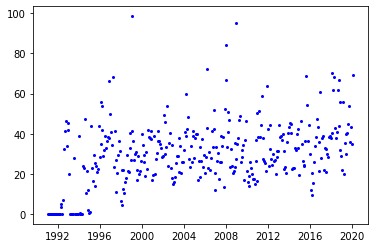

In [125]:
#plot ERA 5 data and CFHT data (takes too much time, which makes not really sense!? because of memory?)

plot_ERA5_and_data(df_RH_monthly, ds_MaunaKea_RH_resampled_monthly, 'r', 'MaunaKea_Era5_RH_1991to2018.pdf', 'Relative humidity (%)', plot_title = 'Relative humidity, Era 5, monthly', ylim = (0, 100))

In [5]:
vstack(ds_MaunaKea_RH_resampled_monthly['r']

<xarray.DataArray 'r' (time: 336)>
dask.array<concatenate, shape=(336,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 1991-01-31 1991-02-28 ... 2018-12-31
    latitude   float32 19.5
    longitude  float32 204.75

In [4]:
# write ERA5 data into dataframe in order to print a csv file

df_ERA5_monthly = ds_MaunaKea_RH_resampled_monthly.to_dataframe()
df_ERA5_daily = ds_MaunaKea_RH_resampled_daily.to_dataframe()
df_ERA5_hourly = ds_MaunaKea_RH_resampled_hourly.to_dataframe()


RuntimeError: Transport endpoint is not connected

In [ ]:
# save the csv file of the resampled ERA5 data for MaunaKea

df_ERA5_monthly.to_csv('downsampled_ERA5_RH_1991to2018_monthly_means.csv')
df_ERA5_daily.to_csv('downsampled_ERA5_RH_1991to2018_daily_means.csv')
df_ERA5_hourly.to_csv('downsampled_ERA5_RH_1991to2018_hourly_means.csv')

In [10]:
# write observational resampled data into csv file

df_RH_monthly.to_csv('downsampled_unasked_RH_1991to2018_monthly_means.csv')
df_RH_daily.to_csv('downsampled_unmasked_RH_1991to2018_daily_means.csv')
df_RH_hourly.to_csv('downsampled_unmasked_RH_1991to2018_hourly_means.csv')


In [ ]:
#CODE ENDS HERE

In [34]:
del tables

In [150]:
# how can I change this behaviour?
df_ERA5_r = ds_MaunaKea_RH_resampled_monthly['r'].to_dataframe()
df_ERA5_r['r']

In [42]:
#convert TEMPERATURE to timeseries
import sunpy.timeseries as ts  

#change parameters for every file
filename = 'downsampled_Temperatur_hourly_mean.csv'


timeseries = []
downsampled = []

#tables_to2000 = []
#tables_to2000[:10] = tables[:10]



for i, table in enumerate(tables):#tables_to2000
    timeseries.append(ts.TimeSeries(hstack([table['times'], table['temperature(C)']])))
    downsampled.append(timeseries[i].data.resample('1m').mean()) #1m for monthly mean, 1d for daily mean, 1h for hourly mean
df_T = pd.concat(downsampled)

# save to csv
#df.to_csv(filename)

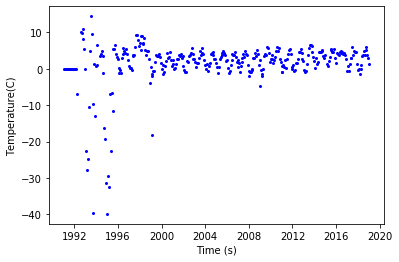

In [43]:
# save to csv
df_T.to_csv(filename)
#and plot
plt.plot(df_T, 'bo', markersize = '2')
#ax.set_ylim([0, 100]) #error "name ax is not defined" appears"

#change y label and fig name!!
fig_name = '1991_2018_CFHT_Temperature_monthly_mean.pdf'
plt.ylabel("Temperature(C)")

plt.xlabel("Time (s)")
plt.savefig(fig_name)